# World Happiness Report

* Explain dataset

## Data Processing

Importing packages and dataset used for analysis

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv('data/world-happiness-report.csv')
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


Renaming and keeping the columns of the dataset appropriate to our analysis

In [78]:
df.rename(columns={'Country name':'country', 'Life Ladder':'happiness_score'
                   , 'Log GDP per capita':'log_gdp','Perceptions of corruption':'corruption',
                  "Social support":"social_support", "Healthy life expectancy at birth":'life_expectancy',
                  "Freedom to make life choices":"freedom"}, inplace=True)
"""df = df.drop(['Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
              'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy',
             'Explained by: Freedom to make life choices','Explained by: Perceptions of corruption'], axis = 1)"""
df

,country,year,happiness_score,log_gdp,social_support,life_expectancy,freedom,Generosity,corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


##### Check for any missing values 

In [79]:
df.isnull().sum()

country              0
year                 0
happiness_score      0
log_gdp             36
social_support      13
life_expectancy     55
freedom             32
Generosity          89
corruption         110
Positive affect     22
Negative affect     16
dtype: int64

In [80]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
pd.options.display.max_rows = 15
rows_with_NaN['country'].value_counts()

China                        15
Kosovo                       14
Jordan                       13
Saudi Arabia                 13
Hong Kong S.A.R. of China    11
                             ..
Bangladesh                    1
Poland                        1
Romania                       1
Maldives                      1
Tunisia                       1
Name: country, Length: 74, dtype: int64

In [81]:
df.loc[df['country']=='China']

,country,year,happiness_score,log_gdp,social_support,life_expectancy,freedom,Generosity,corruption,Positive affect,Negative affect
342,China,2006,4.560,8.696,0.747,66.88,NaN,NaN,NaN,0.809,0.170
343,China,2007,4.863,8.824,0.811,67.06,NaN,-0.176,NaN,0.817,0.159
344,China,2008,4.846,8.911,0.748,67.24,0.853,-0.092,NaN,0.817,0.147
345,China,2009,4.454,8.996,0.798,67.42,0.771,-0.160,NaN,0.786,0.162
346,China,2010,4.653,9.092,0.768,67.60,0.805,-0.133,NaN,0.765,0.158
347,China,2011,5.037,9.179,0.787,67.76,0.824,-0.186,NaN,0.820,0.134
348,China,2012,5.095,9.249,0.788,67.92,0.808,-0.185,NaN,0.821,0.159
349,China,2013,5.241,9.319,0.778,68.08,0.805,-0.158,NaN,0.836,0.142
350,China,2014,5.196,9.386,0.820,68.24,NaN,-0.217,NaN,0.854,0.112
351,China,2015,5.304,9.449,0.794,68.40,NaN,-0.244,NaN,0.809,0.171


Replaced all missing values with 0

In [82]:
df = df.fillna(0)

In [83]:
df.isnull().sum()

country            0
year               0
happiness_score    0
log_gdp            0
social_support     0
life_expectancy    0
freedom            0
Generosity         0
corruption         0
Positive affect    0
Negative affect    0
dtype: int64

##### Check duplicate rows

In [87]:
len(df[df.duplicated()])

0

## Early Data Analysis

Distribution of Countries

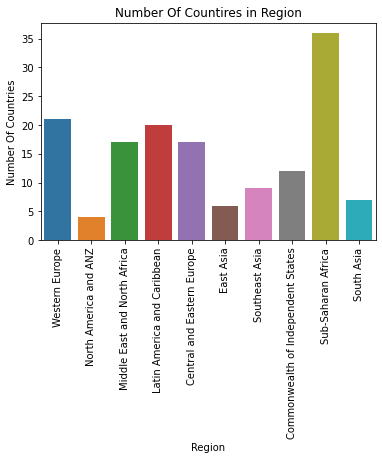

In [16]:
sns.countplot(df['region'])
plt.title('Number Of Countires in Region')
plt.ylabel('Number Of Countries')
plt.xlabel('Region')
plt.xticks(rotation = 90)
plt.show()

Distribution of data across all countries

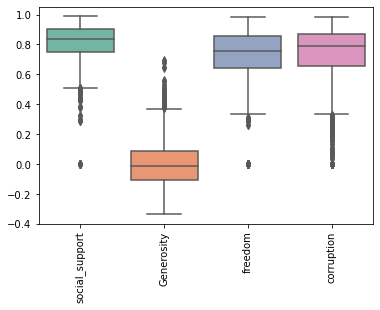

In [88]:
features = ['social_support','Generosity', 'freedom', 'corruption']
sns.boxplot(data= df.loc[:,features], orient = 'v',palette = 'Set2')
plt.xticks(rotation=90)
plt.show()

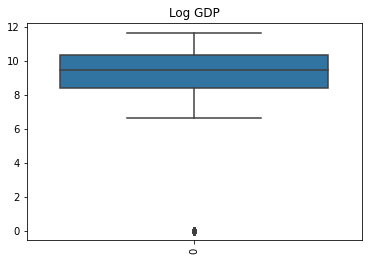

<Figure size 1440x1440 with 0 Axes>

In [97]:
sns.boxplot(data=df['log_gdp'])
plt.xticks(rotation=90)
plt.title("Log GDP")
fig=plt.figure(figsize=(20,20))
plt.show()

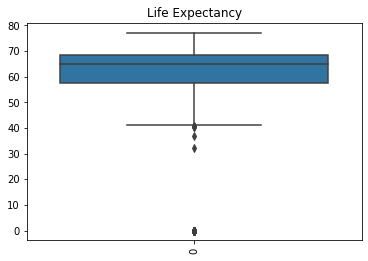

In [98]:
sns.boxplot(data=df['life_expectancy'])
plt.title("Life Expectancy")
plt.xticks(rotation=90)
plt.show()

Correlations between various features

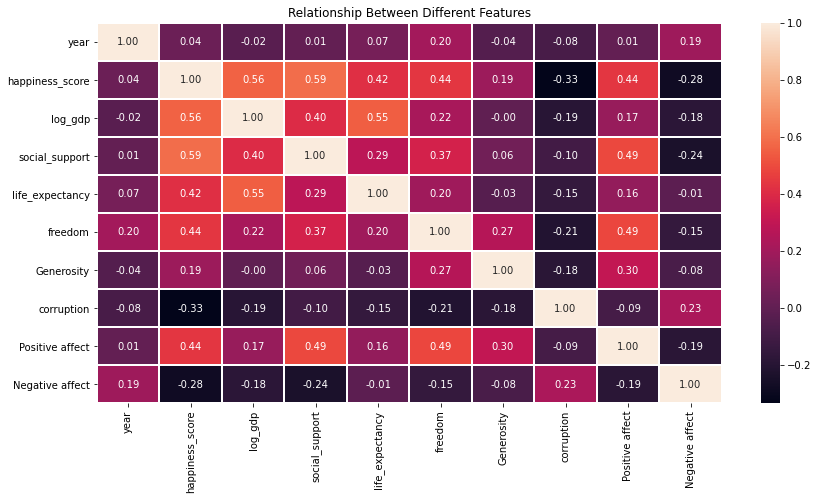

In [112]:
plt.figure(figsize = (14,7))
sns.heatmap(df.corr(), annot = True, fmt = '.2f',linewidth = 0.8)
plt.title('Relationship Between Different Features')
plt.show()

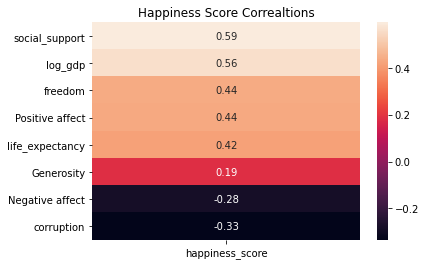

In [133]:
happiness = df.corr()['happiness_score'].to_frame().sort_values('happiness_score', ascending=False)
happiness = happiness.drop(['year', 'happiness_score'])
sns.heatmap(happiness, annot=True)
plt.title("Happiness Score Correaltions")
plt.show()

### Hypothesis

Based on our EDA, we hypothesize that social support, log GDP, freedom and life_expectancy have a positive correlation to the happiness score of a country.

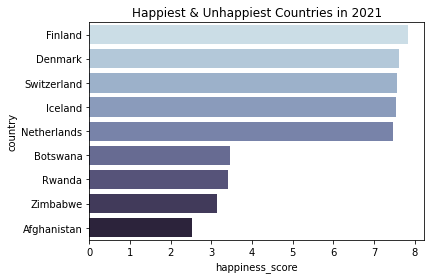

In [20]:
df_2021_happy_unhappy = df[(df.loc[:,'happiness_score']> 7.4) | (df.loc[:,'happiness_score']< 3.5)]

sns.barplot(x = 'happiness_score', y = 'country', data=df_2021_happy_unhappy,palette='ch:s=.25,rot=-.25')
plt.title('Happiest & Unhappiest Countries in 2021')
plt.show()

In [91]:
pop_df = df[['country', 'region', 'happiness_score',
            'social_support','life_expectancy',
            'freedom', 'Generosity']].copy()
cols=pop_df.corr()['happiness_score'].sort_values(ascending=False)
fig=plt.figure(figsize=(20,20))
plt.suptitle("Features that contribute to Happiness Score",family='Serif', weight='bold', size=20)
j=0
for i in cols.index[1:]:
    ax=plt.subplot(421+j)
    ax=sns.regplot(data=pop_df, x='happiness_score',y=i)
    ax.legend('')
    j=j+1
    
plt.legend('')

KeyError: "['region'] not in index"